In [2]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np


file = "blues_guitar_riff.wav"
# Waveform
signal, sr = librosa.load(file, sr=22050)  # sr * T -> 22050 * 30


In [5]:
signal.shape[0]

423360

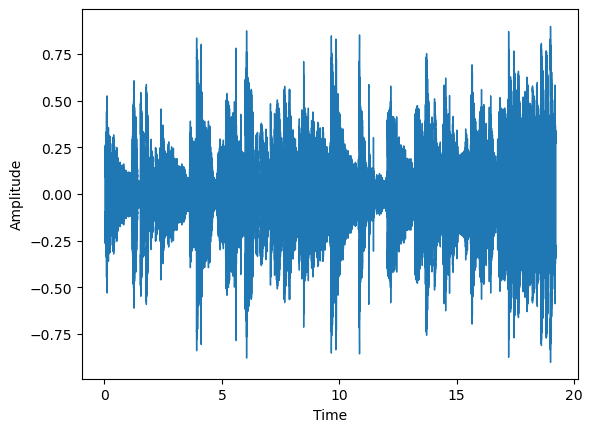

In [5]:
display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [14]:
# fft -> spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency) / 2)]
left_magnitude = magnitude[:int(len(magnitude) / 2)]


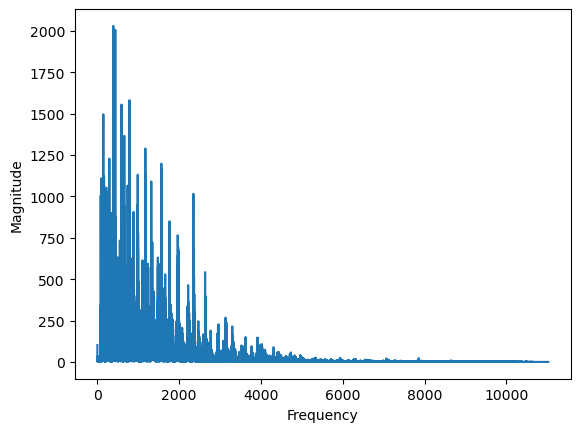

In [7]:
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [4]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

In [4]:
def f1(signal, noise_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_factor
    n_fft = 2048
    hop_length = 512

    stft = librosa.core.stft(augmented_signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.show()

In [13]:
def f2(signal, sr, num_semitones):
    augmented_signal = librosa.effects.pitch_shift(signal, sr=sr, n_steps=num_semitones)
    n_fft = 2048
    hop_length = 512

    stft = librosa.core.stft(augmented_signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.show()

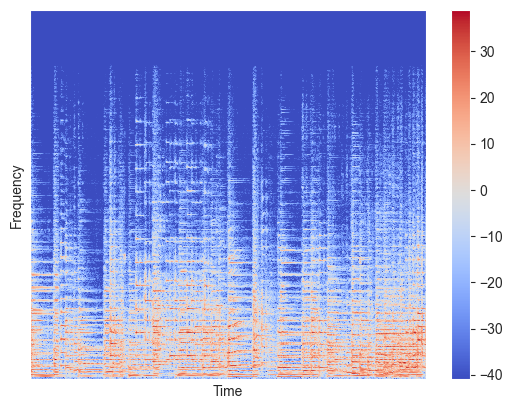

In [15]:
f2(signal, sr, -2)

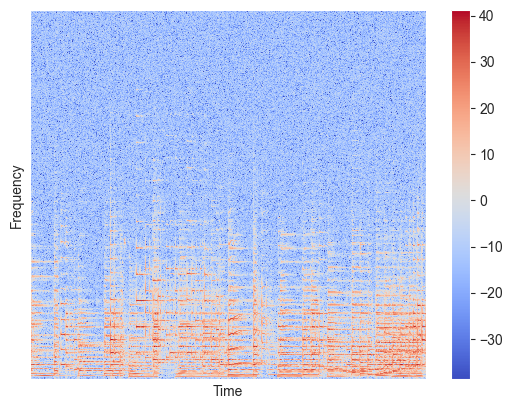

In [12]:
f1(signal, 0.07)

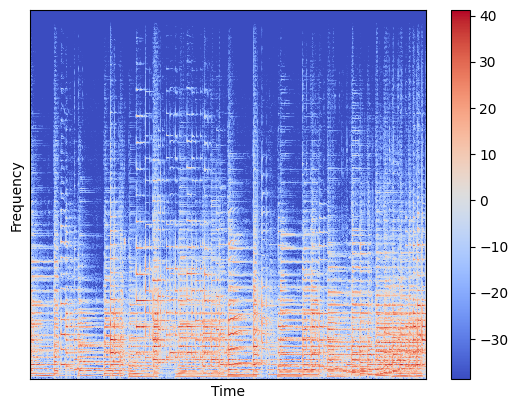

In [6]:
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [ ]:
def add_white_noise(signal, noise_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_factor
    return augmented_signal

In [ ]:
add_white_noise(signal, 0.1)

In [5]:
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

TypeError: mfcc() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given